In [1]:
# Pour que les changements dans les modules importés (bandits.py) soient pris en compte
%load_ext autoreload
%autoreload 2
# Pour afficher les figures dans le notebook
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Changement des paramètres d'affichage par défaut
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 20, 10
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['font.size'] = 24
mpl.rcParams['lines.markersize'] = 15
mpl.rcParams['axes.grid'] = True
# mpl.rcParams.find_all('')

Le fichier `bandits.py` contient les classes pour générer des problèmes de bandits et pour les résoudre. Ce notebook utilise ces objets pour conduire quelques expériences.

Il vous appartient d'étudier le code du notebook **et** du fichier `bandits.py`. Vous complèterez les méthodes manquantes de ce fichier en suivant les indications du notebook. N'hésitez pas à créer d'autres scripts ou cellules de notebook pour tester votre code.

In [4]:
try:
    # Pour utiliser la correction (prof)
    import bandits_correction as bandits
    import exp_correction
    print('Correction importée')
except:
    # Pour utiliser le code fourni à compléter (étudiants)
    import bandits

# Exemple de problème de bandits
La classe `BernoulliMultiArmedBandits` permet de créer un problème de bandits en donnant les vraies valeurs de chaque bras (valeur entre 0 et 1). Une distribution de Bernoulli est utilisée pour chaque bras, le paramètre de la distribution étant la valeur du bras.

In [5]:
# Création d'un problème avec 4 bras
bandits_pb = bandits.BernoulliMultiArmedBanditsEnv(means = [0.1, 0.85, 0.7, 0.849])
print(bandits_pb)

4-arms bandit problem with Bernoulli distributions


In [6]:
print('On tire 10 fois le bras 0 et on affiche les récompenses:')
for _ in range(10):
    print(int(bandits_pb.step(a=0)))

On tire 10 fois le bras 0 et on affiche les récompenses:
0
0
0
0
0
0
0
1
1
0


In [7]:
print('On tire 10 fois le bras 1 et on affiche les récompenses:')
for _ in range(10):
    print(int(bandits_pb.step(a=1)))

On tire 10 fois le bras 1 et on affiche les récompenses:
1
1
0
1
1
1
1
0
1
1


Gain moyen du bras 0 sur 100 tirages: 0.150 (espérance du bras: 0.100)
Gain moyen du bras 1 sur 100 tirages: 0.890 (espérance du bras: 0.850)
Gain moyen du bras 2 sur 100 tirages: 0.730 (espérance du bras: 0.700)
Gain moyen du bras 3 sur 100 tirages: 0.870 (espérance du bras: 0.849)


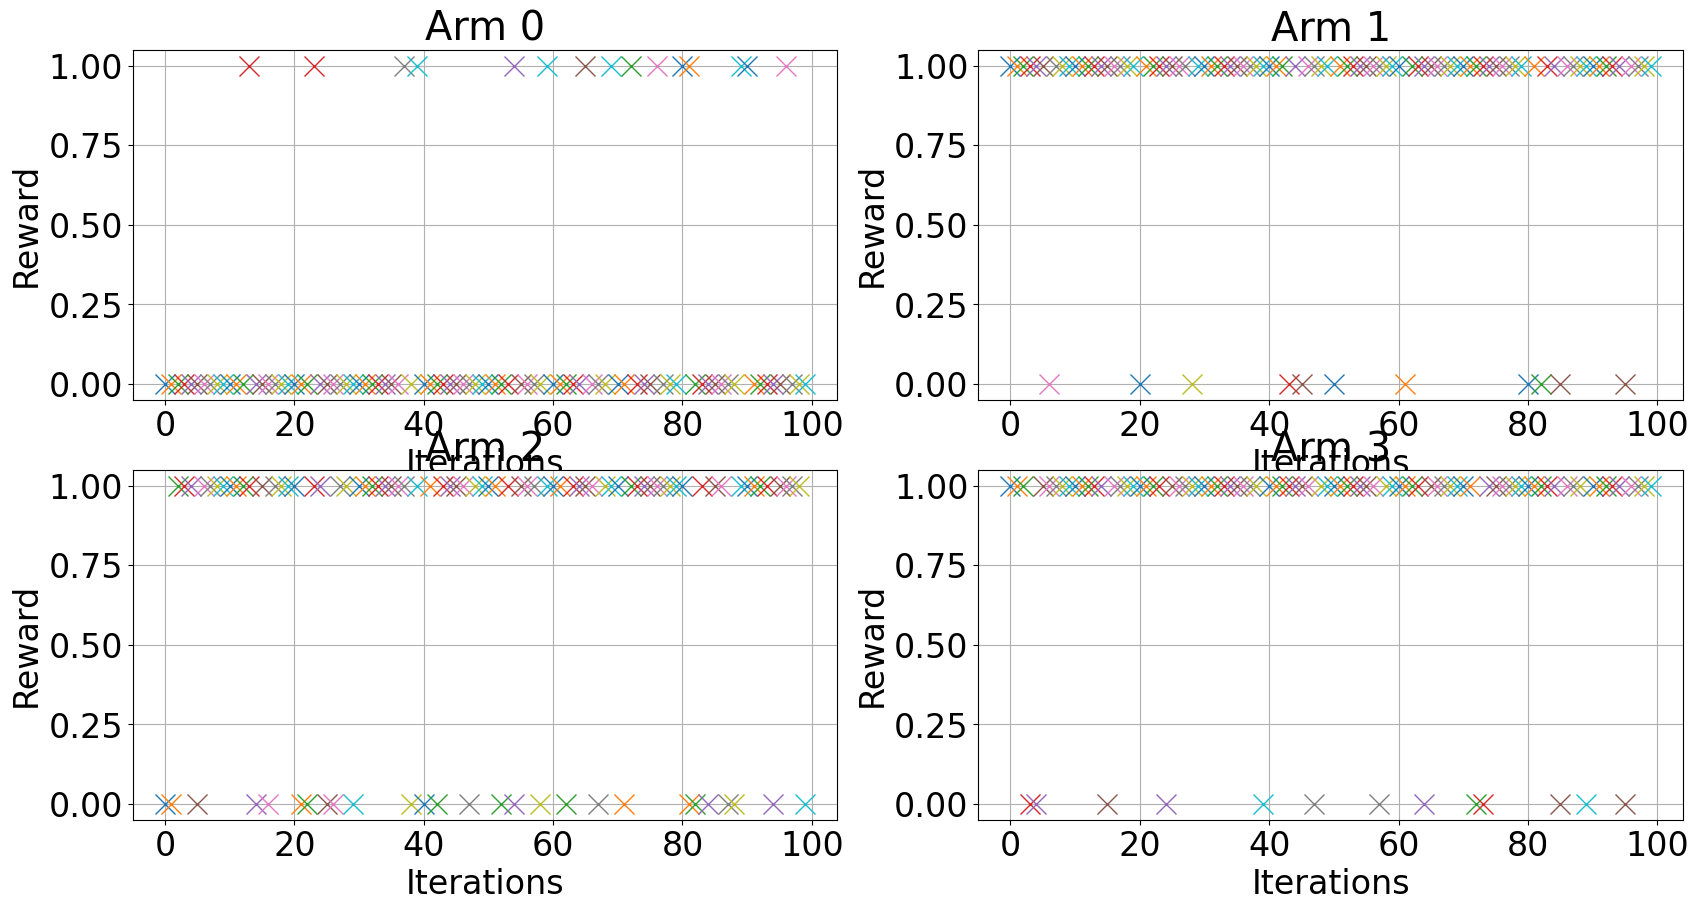

In [8]:
# Tirer 100 fois chaque bras 
# et comparer la moyenne des gains aux vraies valeurs des bras (espérances inconnues)
n_draws = 100
for i_arm in range(bandits_pb.n_arms):
    x = 0
    plt.subplot(2, 2, i_arm+1)
    for i_draw in range(n_draws):
        r = bandits_pb.step(a=i_arm)
        x += r
        plt.plot(i_draw, r, 'x')
    plt.title('Arm {}'.format(i_arm))
    plt.xlabel('Iterations')
    plt.ylabel('Reward')
    print('Gain moyen du bras {} sur {} tirages: {:.3f} (espérance du bras: {:.3f})'
          .format(i_arm, n_draws, x/n_draws, bandits_pb._true_values[i_arm]))

**À faire.** Étudiez le code de la classe `BernoulliMultiArmedBanditsEnv`.

La classe `NormalMultiArmedBanditsEnv` permet de créer un problème de bandits où chaque bras suit une distribution normale (gaussienne), dont on spécifie la moyenne (et éventuellement l'écart type) au moment de la création.

In [9]:
gaussian_bandits_pb = bandits.NormalMultiArmedBanditsEnv(means=[0.1, 0.85, 0.7, 0.849, 3, -2, 3.1])
print(gaussian_bandits_pb)
print('On tire 10 fois le bras 0 et on affiche les récompenses:')
n_draws = 10
for i_draw in range(n_draws):
    print(gaussian_bandits_pb.step(a=0))

7-arms bandit problem with Normal distributions
On tire 10 fois le bras 0 et on affiche les récompenses:
0.7097436606270225
-1.2457440499870247
1.3855988614933605
0.5429117893211378
-0.3698684107184643
-1.110668236817049
1.46328800942843
-1.073826647350986
1.512432520249071
-0.4727702384500251


Gain moyen du bras 0 sur 20 tirages: 0.129 (espérance du bras: 0.100)
Gain moyen du bras 1 sur 20 tirages: 0.759 (espérance du bras: 0.850)
Gain moyen du bras 2 sur 20 tirages: 1.087 (espérance du bras: 0.700)
Gain moyen du bras 3 sur 20 tirages: 0.276 (espérance du bras: 0.849)
Gain moyen du bras 4 sur 20 tirages: 2.354 (espérance du bras: 3.000)
Gain moyen du bras 5 sur 20 tirages: -2.050 (espérance du bras: -2.000)
Gain moyen du bras 6 sur 20 tirages: 3.304 (espérance du bras: 3.100)


Text(0, 0.5, 'Reward')

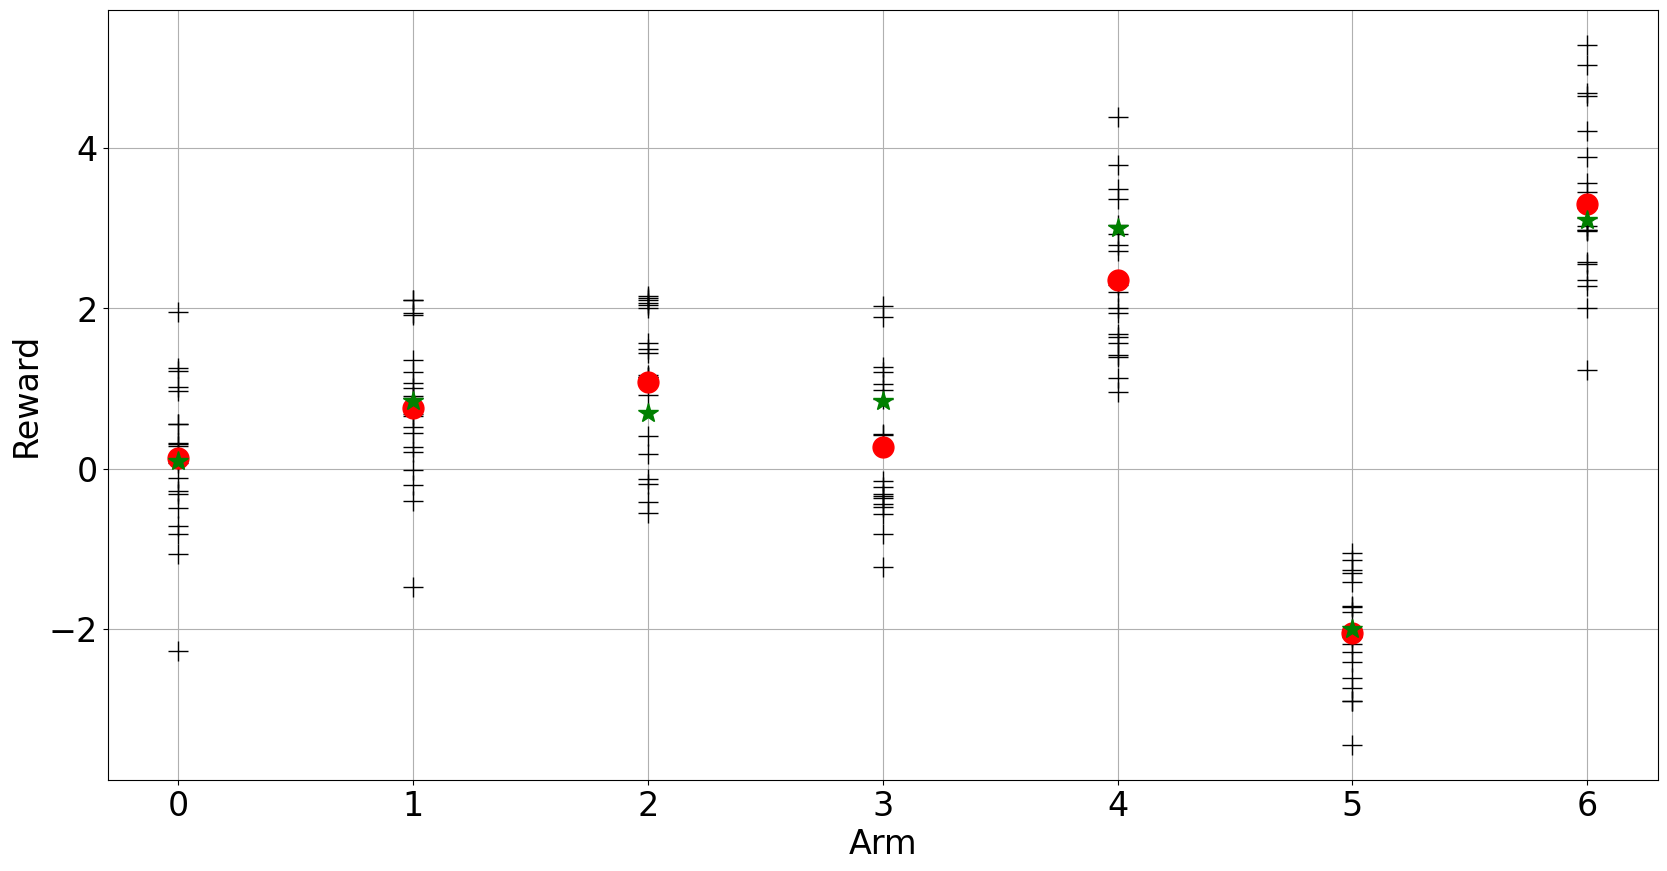

: 

In [ ]:
# Tirer 20 fois chaque bras et afficher les récompenses
# et comparer la moyenne des gains aux vraies valeurs des bras (espérances inconnues)
n_draws = 20
for i_arm in range(gaussian_bandits_pb.n_arms):
    x = 0
    for i_draw in range(n_draws):
        r = gaussian_bandits_pb.step(i_arm)
        x += r
        plt.plot(i_arm, r, '+k')
    plt.plot(i_arm, x/n_draws, 'or')
    plt.plot(i_arm, gaussian_bandits_pb._true_values[i_arm], '*g')
    print('Gain moyen du bras {} sur {} tirages: {:.3f} (espérance du bras: {:.3f})'
          .format(i_arm, n_draws, x/n_draws, gaussian_bandits_pb._true_values[i_arm]))
plt.xlabel('Arm')
plt.ylabel('Reward')

**À retenir:**
- il y a plusieurs modèles de problèmes (ou environnements) de bandits possibles (Bernoulli, gaussien, etc.)
- l'objet contient les vraies valeurs des bras, inconnues de l'agent (attribut `_true_values`)
- la méthode `step(a)` permet de jouer le bras `a` et renvoie la récompense obtenue